## Fit ARIMA model for Good

                               SARIMAX Results                                
Dep. Variable:                   Good   No. Observations:                   76
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -171.386
Date:                Tue, 01 Apr 2025   AIC                            348.772
Time:                        18:11:31   BIC                            355.764
Sample:                             0   HQIC                           351.567
                                 - 76                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.1104      0.339     97.672      0.000      32.446      33.775
ma.L1          0.1738      0.112      1.546      0.122      -0.047       0.394
sigma2         5.3222      0.985      5.404      0.0

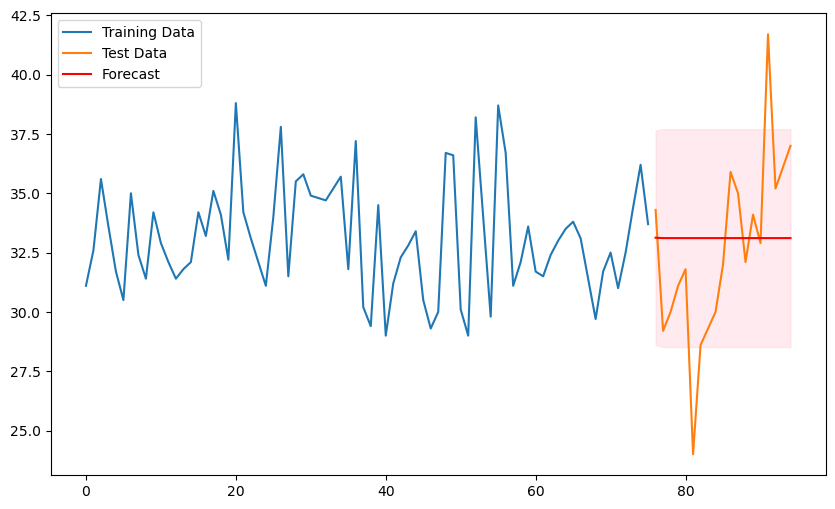

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
file_path = '../data/processed/cleaned_dataset_v55.csv'
df = pd.read_csv(file_path)

# Split 80% for training, 20% for testing
train_size = int(len(df['Good']) * 0.8)
train, test = df['Good'][:train_size], df['Good'][train_size:]

# Fit ARIMA model on training data
model = ARIMA(train.dropna(), order=(0, 0, 1))
result = model.fit()

# Display model summary
print(result.summary())

# Forecast using the test set
forecast = result.get_forecast(steps=len(test))
forecast_ci = forecast.conf_int()

# Align forecast index with integer-based index
forecast_index = np.arange(len(train), len(train) + len(test))
forecast_mean = forecast.predicted_mean.values
forecast_ci = forecast.conf_int().values

# Plot forecast vs actual
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index,
                 forecast_ci[:, 0],
                 forecast_ci[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()



## Fit SARIMA for Good

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.51583D+00    |proj g|=  2.54397D-01

At iterate    5    f=  4.45466D+00    |proj g|=  2.09432D-02

At iterate   10    f=  4.31659D+00    |proj g|=  4.78964D-01

At iterate   15    f=  4.19417D+00    |proj g|=  1.36894D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     17     27      1     0     0   1.390D-06   4.194D+00
  F =   4.1941682619299048     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
        

 This problem is unconstrained.


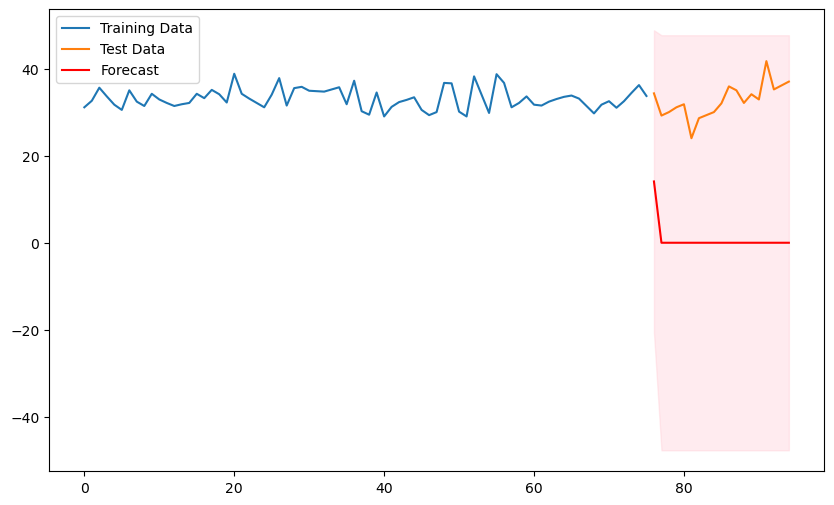

In [6]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model on training data
model = SARIMAX(train.dropna(),
                order=(0, 0, 1),
                seasonal_order=(0, 0, 0, 4),  # No seasonal terms
                enforce_stationarity=False,
                enforce_invertibility=False)

result = model.fit()

# Display model summary
print(result.summary())

# Forecast using the test set
forecast = result.get_forecast(steps=len(test))
forecast_ci = forecast.conf_int()

# Align forecast index with integer-based index
import numpy as np
forecast_index = np.arange(len(train), len(train) + len(test))
forecast_mean = forecast.predicted_mean.values
forecast_ci = forecast.conf_int().values

# Plot forecast vs actual
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index,
                 forecast_ci[:, 0],
                 forecast_ci[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()


In [7]:
# High AIC/BIC → Model overfitting or poor specification
# SARIMA Didn't Work

## Fit SARIMAX for Good

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.51662D+00    |proj g|=  2.39605D-01

At iterate    5    f=  4.46663D+00    |proj g|=  1.90568D-02

At iterate   10    f=  4.27469D+00    |proj g|=  5.98557D-02

At iterate   15    f=  4.27406D+00    |proj g|=  2.90361D-02

At iterate   20    f=  4.26384D+00    |proj g|=  2.15966D-01

At iterate   25    f=  4.20608D+00    |proj g|=  2.59306D-02

At iterate   30    f=  4.20506D+00    |proj g|=  4.68110D-02

At iterate   35    f=  4.20115D+00    |proj g|=  9.52622D-03

At iterate   40    f=  4.20033D+00    |proj g|=  5.20120D-02


 This problem is unconstrained.



At iterate   45    f=  4.19820D+00    |proj g|=  3.68896D-02

At iterate   50    f=  4.18956D+00    |proj g|=  5.58649D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     50     63      1     0     0   5.586D-03   4.190D+00
  F =   4.1895555035040415     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                               SARIMAX Results                                
Dep. Variable:                   Good   No. Observations:                   76
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -318.406
Date:                Tue, 01 Apr 2025   AIC                   

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


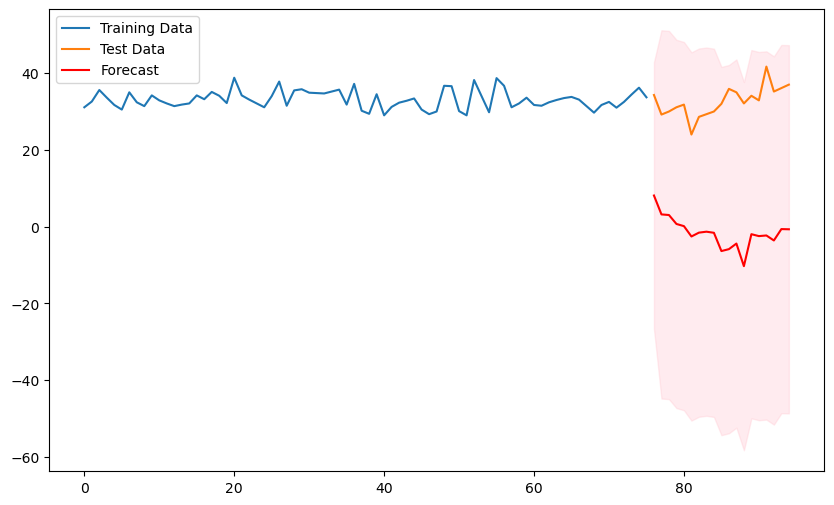


Ljung-Box Test:
      lb_stat     lb_pvalue
4   22.389891  1.676011e-04
8   44.032077  5.610736e-07
12  56.765276  8.713975e-08


In [9]:
# try SARIMAX

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define independent variables (exog) for SARIMAX
exog = df[['Quarterly Sum Precip (mm)_diff', 'CPI Compounded_diff',
           'Debt_to_Asset_Ratio_diff', 'Mortgage_Debt_to_Real_Estate_Ratio_diff',
           'Depression_diff', 'Anxiety_diff', 'Stress_diff', 
           'Unemployment Rate_diff', 'Quarterly Avg Temp (°C)_diff',
           'Therapy_diff2']]

# Split exog into train and test
exog_train = exog.iloc[:train_size]
exog_test = exog.iloc[train_size:]

# Fit SARIMAX model with independent variables
model = SARIMAX(train.dropna(),
                exog=exog_train,
                order=(0, 0, 1),                 # Non-seasonal order
                seasonal_order=(0, 0, 0, 4),      # No seasonal terms
                enforce_stationarity=False,
                enforce_invertibility=False)

result = model.fit()

# Display model summary
print(result.summary())

# Forecast using the test set
forecast = result.get_forecast(steps=len(test), exog=exog_test)
forecast_ci = forecast.conf_int()

# Align forecast index with integer-based index
import numpy as np
forecast_index = np.arange(len(train), len(train) + len(test))
forecast_mean = forecast.predicted_mean.values
forecast_ci = forecast.conf_int().values

# Plot forecast vs actual
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index,
                 forecast_ci[:, 0],
                 forecast_ci[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()

# Ljung-Box Test for residual autocorrelation
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(result.resid, lags=[4, 8, 12], return_df=True)
print("\nLjung-Box Test:")
print(lb_test)


In [10]:
#export df
import os
import pandas as pd

# Ensure output directory exists
output_dir = '../data/processed/'
os.makedirs(output_dir, exist_ok=True)

# Combine actuals: training + test
full_actual = pd.concat([train, test])
full_actual.name = 'Actual'

# Combine predicted: training + forecast
forecast_series = pd.Series(forecast_mean, index=forecast_index)
full_predicted = pd.concat([train, forecast_series])
full_predicted.name = 'Actual + Forecast'

# Build DataFrame for export
export_combined = pd.DataFrame({
    'Actual': full_actual,
    'Predicted': full_predicted
})

# Add confidence intervals only for forecast portion
lower_ci = pd.Series(forecast_ci[:, 0], index=forecast_index)
upper_ci = pd.Series(forecast_ci[:, 1], index=forecast_index)

export_combined['Lower_CI'] = pd.concat([pd.Series([None] * len(train), index=train.index), lower_ci])
export_combined['Upper_CI'] = pd.concat([pd.Series([None] * len(train), index=train.index), upper_ci])

# Export to CSV
export_path = os.path.join(output_dir, 'sarima_actual_vs_forecast_all_inde_Good.csv')
export_combined.to_csv(export_path)

print(f"Export completed: '{export_path}'")


Export completed: '../data/processed/sarima_actual_vs_forecast_all_inde_Good.csv'


In [11]:
# The target variable ("Good") might not be strongly influenced by external factors → Independent variables are not contributing enough
# High variance (sigma²) → Suggests that noise or randomness is dominating the model
# Ljung-Box test failure → Significant autocorrelation → The model isn’t capturing the full structure of the data

## Fit SARIMAX model without independent variables

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.51583D+00    |proj g|=  2.54397D-01

At iterate    5    f=  4.45466D+00    |proj g|=  2.09432D-02

At iterate   10    f=  4.31659D+00    |proj g|=  4.78964D-01

At iterate   15    f=  4.19417D+00    |proj g|=  1.36894D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     17     27      1     0     0   1.390D-06   4.194D+00
  F =   4.1941682619299048     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
        

 This problem is unconstrained.


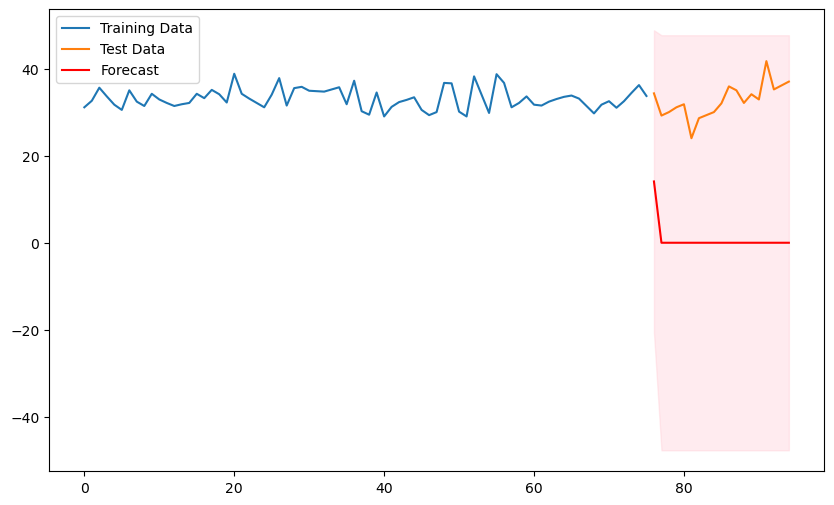


Ljung-Box Test:
       lb_stat     lb_pvalue
4    72.575912  6.484994e-15
8   133.021512  6.683471e-25
12  175.672161  3.293088e-31


In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMAX model without independent variables
model = SARIMAX(train.dropna(),
                order=(0, 0, 1),                 # Non-seasonal order
                seasonal_order=(0, 0, 0, 4),      # No seasonal terms
                enforce_stationarity=False,
                enforce_invertibility=False)

result = model.fit()

# Display model summary
print(result.summary())

# Forecast using the test set
forecast = result.get_forecast(steps=len(test))
forecast_ci = forecast.conf_int()

# Align forecast index with integer-based index
import numpy as np
forecast_index = np.arange(len(train), len(train) + len(test))
forecast_mean = forecast.predicted_mean.values
forecast_ci = forecast.conf_int().values

# Plot forecast vs actual
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index,
                 forecast_ci[:, 0],
                 forecast_ci[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()

# Ljung-Box Test for residual autocorrelation
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test = acorr_ljungbox(result.resid, lags=[4, 8, 12], return_df=True)
print("\nLjung-Box Test:")
print(lb_test)


### Simplify the SARIMAX terms → (1, 0, 0)(1, 0, 0, 4)
### Use only statistically significant independent variables

/var/folders/s9/tqddl7514mg7mxtqh4gs3k1h0000gn/T/ipykernel_70332/3485370005.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['YEAR'].astype(int).astype(str) + 'Q' + df['QUARTER'].astype(int).astype(str))
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.76430D+00    |proj g|=  8.10044D-02

At iterate    5    f=  3.21827D+00    |proj g|=  1.15518D-01

At iterate   10    f=  2.77421D+00    |proj g|=  2.66703D-02

At iterate   15    f=  2.57462D+00    |proj g|=  1.54160D-02

At iterate   20    f=  2.57299D+00    |proj g|=  2.12266D-03

At iterate   25    f=  2.57296D+00    |proj g|=  6.33271D-05

At iterate   30    f=  2.57295D+00    |proj g|=  2.71890D-04

At iterate   35    f=  2.57295D+00    |proj g|=  5.26147D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

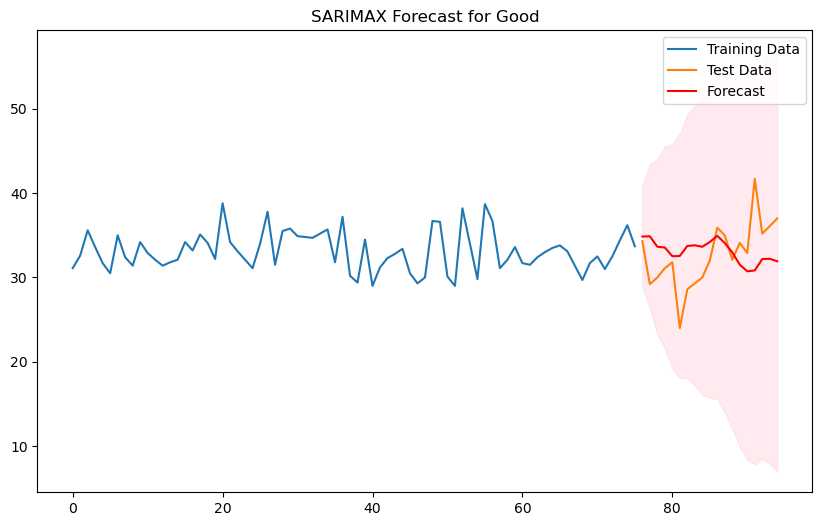

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the dataset
file_path = '../data/processed/cleaned_dataset_v55.csv'
df = pd.read_csv(file_path)

# Set integer-based index
df['date'] = pd.to_datetime(df['YEAR'].astype(int).astype(str) + 'Q' + df['QUARTER'].astype(int).astype(str))
df = df.set_index(pd.RangeIndex(start=0, stop=len(df), step=1))

# Independent variables
independent_vars = [
    'Depression_diff', 'Anxiety_diff', 'Stress_diff', 'Quarterly Avg Temp (°C)_diff'
]

# Split data into training and testing (80/20 split)
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# Fit SARIMAX model for 'Good'
model = SARIMAX(
    train['Good'], 
    exog=train[independent_vars], 
    order=(1, 0, 0), 
    seasonal_order=(1, 0, 0, 4)
)
result = model.fit()

# Display model summary
print(result.summary())

# Forecast
forecast = result.get_forecast(steps=len(test), exog=test[independent_vars])
forecast_ci = forecast.conf_int()

# Plot forecast vs actual
plt.figure(figsize=(10, 6))
plt.plot(train['Good'], label='Training Data')
plt.plot(test['Good'], label='Test Data')
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('SARIMAX Forecast for Good')
plt.show()


In [28]:
import os

# Ensure output directory exists
output_dir = '../data/processed/'
os.makedirs(output_dir, exist_ok=True)

# Combine actual values (train + test)
full_actual = pd.concat([train['Good'], test['Good']])
full_actual.name = 'Actual'

# Combine predicted values (train + forecast)
forecast_index = test.index  # since test already has the correct index
forecast_series = forecast.predicted_mean
full_predicted = pd.concat([train['Good'], forecast_series])
full_predicted.name = 'Actual + Forecast'

# Build export DataFrame
export_combined = pd.DataFrame({
    'Actual': full_actual,
    'Predicted': full_predicted
})

# Add confidence intervals for forecast portion only
lower_ci = pd.Series(forecast_ci.iloc[:, 0].values, index=forecast_index)
upper_ci = pd.Series(forecast_ci.iloc[:, 1].values, index=forecast_index)

export_combined['Lower_CI'] = pd.concat([
    pd.Series([None] * len(train), index=train.index),
    lower_ci
])
export_combined['Upper_CI'] = pd.concat([
    pd.Series([None] * len(train), index=train.index),
    upper_ci
])

# Export to CSV
export_path = os.path.join(output_dir, 'sarima_actual_vs_forecast_partial_inde_Good.csv')
export_combined.to_csv(export_path)

print(f"Export completed: '{export_path}'")


Export completed: '../data/processed/sarima_actual_vs_forecast_partial_inde_Good.csv'
